# Import Libraries

In [4]:
from sklearn import datasets
iris = datasets.load_iris()
digits = datasets.load_digits()
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
import pickle

# Read Data

In [2]:
testData = pd.read_csv('test.csv')
trainData = pd.read_csv('train.csv')

# Understand Data

In [3]:
print(trainData)

     height  weight    hair beard scarf  gender
0  180.3000     196    Bald   Yes    No    Male
1  170.0000     120    Long    No    No  Female
2  178.5000     200   Short    No    No    Male
3  163.4000     110  Medium    No   Yes  Female
4  175.2222     220   Short   Yes    No    Male
5  165.0000     150  Medium    No   Yes  Female


In [4]:
print(testData)

   height  weight    hair beard scarf  gender
0   179.1     185    Long   Yes    No    Male
1   160.5     130   Short    No    No  Female
2   177.8     160    Bald    No    No    Male
3   161.1     100  Medium    No    No  Female


In [5]:
trainData.columns

Index(['height', 'weight', 'hair', 'beard', 'scarf', 'gender'], dtype='object')

In [6]:
testData.columns

Index(['height', 'weight', 'hair', 'beard', 'scarf', 'gender'], dtype='object')

In [7]:
print("Number of Instances in train Data = %d"%len(trainData))

Number of Instances in train Data = 6


In [8]:
print("Number of Instances in Test Data = %d"%len(testData))

Number of Instances in Test Data = 4


In [9]:
print("Number of Instances in Train Data have male gender = %d"%len(trainData[trainData["gender"]=="Male"]))

Number of Instances in Train Data have male gender = 3


In [10]:
trainData[trainData["gender"]=="Male"]

,height,weight,hair,beard,scarf,gender
0,180.3000,196,Bald,Yes,No,Male
2,178.5000,200,Short,No,No,Male
4,175.2222,220,Short,Yes,No,Male


In [11]:
print("Number of Instances in Train Data have male gender = %d"%len(trainData[trainData["gender"]=="Female"]))

Number of Instances in Train Data have male gender = 3


In [12]:
trainData[trainData["gender"]=="Female"]

,height,weight,hair,beard,scarf,gender
1,170.0,120,Long,No,No,Female
3,163.4,110,Medium,No,Yes,Female
5,165.0,150,Medium,No,Yes,Female


In [13]:
print("Number of Instances in Test Data have male gender = %d"%len(testData[testData["gender"]=="Male"]))

Number of Instances in Test Data have male gender = 2


In [14]:
testData[testData["gender"]=="Male"]

,height,weight,hair,beard,scarf,gender
0,179.1,185,Long,Yes,No,Male
2,177.8,160,Bald,No,No,Male


In [15]:
print("Number of Instances in Test Data have male gender = %d"%len(testData[testData["gender"]=="Female"]))

Number of Instances in Test Data have male gender = 2


In [16]:
testData[testData["gender"]=="Female"]

,height,weight,hair,beard,scarf,gender
1,160.5,130,Short,No,No,Female
3,161.1,100,Medium,No,No,Female


In [17]:
trainDataCount = trainData.gender.value_counts()
trainDataCount

Female    3
Male      3
Name: gender, dtype: int64

Text(0.5, 1.0, "Total number of 'Male' & 'Female' in train DataSet")

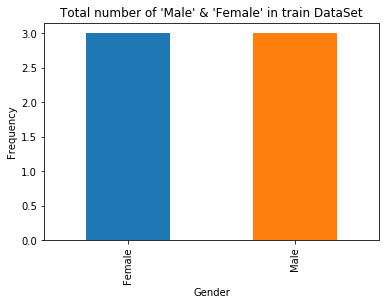

In [18]:
plot = trainDataCount.plot(kind='bar',x='gender')
plot.set_xlabel('Gender')
plot.set_ylabel('Frequency')
plot.set_title("Total number of 'Male' & 'Female' in train DataSet")

In [19]:
testDataCount = testData.gender.value_counts()
testDataCount

Female    2
Male      2
Name: gender, dtype: int64

Text(0.5, 1.0, "Total number of 'Male' & 'Female' in Test DataSet")

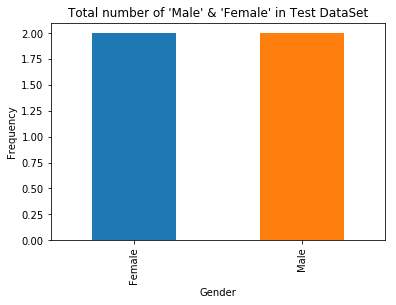

In [20]:
plot = testDataCount.plot(kind='bar',x='gender')
plot.set_xlabel('Gender')
plot.set_ylabel('Frequency')
plot.set_title("Total number of 'Male' & 'Female' in Test DataSet")

Text(0.5, 1.0, 'verios hair lenth in train DataSet')

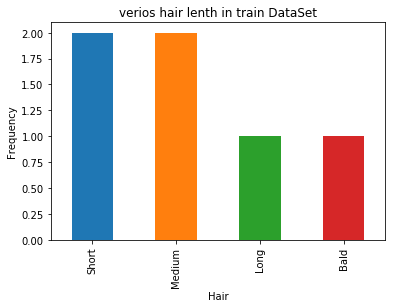

In [21]:
trainHairCount = trainData.hair.value_counts()
plot = trainHairCount.plot(kind='bar',x='Hair')
plot.set_xlabel('Hair')
plot.set_ylabel('Frequency')
plot.set_title("verios hair lenth in train DataSet")

Text(0.5, 1.0, "Total number of 'Yes' & 'No ' in train DataSet")

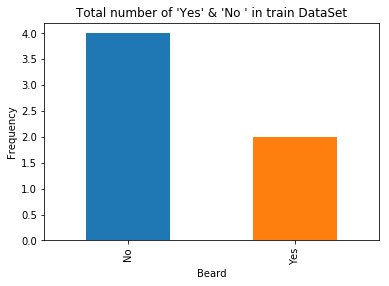

In [22]:
trainBeardCount = trainData.beard.value_counts()
plot = trainBeardCount.plot(kind='bar',x='Beard')
plot.set_xlabel('Beard')
plot.set_ylabel('Frequency')
plot.set_title("Total number of 'Yes' & 'No ' in train DataSet")

Text(0.5, 1.0, "Total number of 'Yes' & 'No ' in train DataSet")

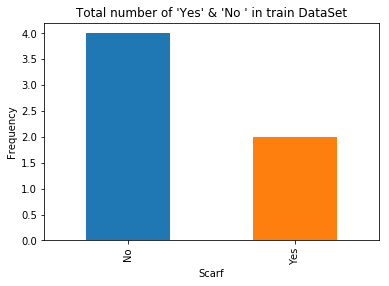

In [23]:
trainScarfCount = trainData.scarf.value_counts()
plot = trainScarfCount.plot(kind='bar',x='Scarf')
plot.set_xlabel('Scarf')
plot.set_ylabel('Frequency')
plot.set_title("Total number of 'Yes' & 'No ' in train DataSet")

Text(0.5, 1.0, 'verios hair lenth in Test DataSet')

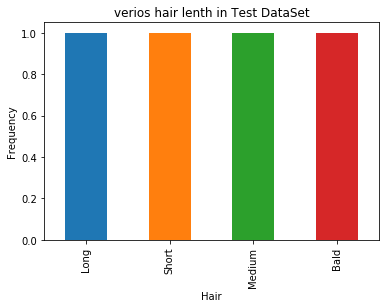

In [24]:
trainHairCount = testData.hair.value_counts()
plot = trainHairCount.plot(kind='bar',x='Hair')
plot.set_xlabel('Hair')
plot.set_ylabel('Frequency')
plot.set_title("verios hair lenth in Test DataSet")

Text(0.5, 1.0, "Total number of 'Yes' & 'No ' in test DataSet")

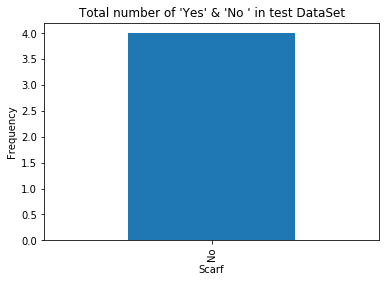

In [25]:
trainScarfCount = testData.scarf.value_counts()
plot = trainScarfCount.plot(kind='bar',x='Scarf')
plot.set_xlabel('Scarf')
plot.set_ylabel('Frequency')
plot.set_title("Total number of 'Yes' & 'No ' in test DataSet")

Text(0.5, 1.0, "Total number of 'Yes' & 'No ' in Test DataSet")

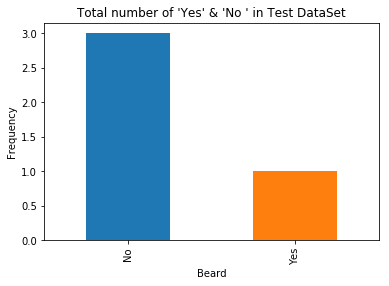

In [26]:
trainBeardCount = testData.beard.value_counts()
plot = trainBeardCount.plot(kind='bar',x='Beard')
plot.set_xlabel('Beard')
plot.set_ylabel('Frequency')
plot.set_title("Total number of 'Yes' & 'No ' in Test DataSet")

# Label Encoding for Train/Test Data

In [27]:
encodeTrainDataSet = trainData.copy();

In [28]:
encodeTestDataSet = testData.copy();

In [29]:
encodeTrainDataSet

,height,weight,hair,beard,scarf,gender
0,180.3000,196,Bald,Yes,No,Male
1,170.0000,120,Long,No,No,Female
2,178.5000,200,Short,No,No,Male
3,163.4000,110,Medium,No,Yes,Female
4,175.2222,220,Short,Yes,No,Male
5,165.0000,150,Medium,No,Yes,Female


In [30]:
encodeTestDataSet

,height,weight,hair,beard,scarf,gender
0,179.1,185,Long,Yes,No,Male
1,160.5,130,Short,No,No,Female
2,177.8,160,Bald,No,No,Male
3,161.1,100,Medium,No,No,Female


In [31]:
gender_encoder = LabelEncoder();
encodeTrainDataSet.insert(len(encodeTrainDataSet),"encoded gender",gender_encoder.fit_transform(encodeTrainDataSet['gender']))


In [33]:
encodeTrainDataSet[['gender','encoded gender']]

,gender,encoded gender
0,Male,1
1,Female,0
2,Male,1
3,Female,0
4,Male,1
5,Female,0


In [34]:
hair_encoder = LabelEncoder();
encodeTrainDataSet.insert(len(encodeTrainDataSet),"encoded hair",hair_encoder.fit_transform(encodeTrainDataSet['hair']))
encodeTrainDataSet[['hair','encoded hair']]

,hair,encoded hair
0,Bald,0
1,Long,1
2,Short,3
3,Medium,2
4,Short,3
5,Medium,2


In [35]:
beard_encoder = LabelEncoder();
encodeTrainDataSet.insert(len(encodeTrainDataSet),"encoded beard",hair_encoder.fit_transform(encodeTrainDataSet['beard']))
encodeTrainDataSet[['beard','encoded beard']]

,beard,encoded beard
0,Yes,1
1,No,0
2,No,0
3,No,0
4,Yes,1
5,No,0


In [36]:
scarf_encoder = LabelEncoder();
encodeTrainDataSet.insert(len(encodeTrainDataSet),"encoded scarf",hair_encoder.fit_transform(encodeTrainDataSet['scarf']))
encodeTrainDataSet[['scarf','encoded scarf']]

,scarf,encoded scarf
0,No,0
1,No,0
2,No,0
3,Yes,1
4,No,0
5,Yes,1


In [37]:
gender_encoder = LabelEncoder();
encodeTestDataSet.insert(len(encodeTestDataSet),"encoded gender",gender_encoder.fit_transform(encodeTestDataSet['gender']))
encodeTestDataSet[['gender','encoded gender']]

,gender,encoded gender
0,Male,1
1,Female,0
2,Male,1
3,Female,0


In [38]:
hair_encoder = LabelEncoder();
encodeTestDataSet.insert(len(encodeTestDataSet),"encoded hair",hair_encoder.fit_transform(encodeTestDataSet['hair']))
encodeTestDataSet[['hair','encoded hair']]

,hair,encoded hair
0,Long,1
1,Short,3
2,Bald,0
3,Medium,2


In [39]:
beard_encoder = LabelEncoder();
encodeTestDataSet.insert(len(encodeTestDataSet),"encoded beard",hair_encoder.fit_transform(encodeTestDataSet['beard']))
encodeTestDataSet[['beard','encoded beard']]

,beard,encoded beard
0,Yes,1
1,No,0
2,No,0
3,No,0


In [40]:
scarf_encoder = LabelEncoder();
encodeTestDataSet.insert(len(encodeTestDataSet),"encoded scarf",hair_encoder.fit_transform(encodeTestDataSet['scarf']))
encodeTestDataSet[['scarf','encoded scarf']]

,scarf,encoded scarf
0,No,0
1,No,0
2,No,0
3,No,0


In [41]:
encodeTrainDataSet

,height,weight,hair,beard,scarf,gender,encoded scarf,encoded beard,encoded hair,encoded gender
0,180.3000,196,Bald,Yes,No,Male,0,1,0,1
1,170.0000,120,Long,No,No,Female,0,0,1,0
2,178.5000,200,Short,No,No,Male,0,0,3,1
3,163.4000,110,Medium,No,Yes,Female,1,0,2,0
4,175.2222,220,Short,Yes,No,Male,0,1,3,1
5,165.0000,150,Medium,No,Yes,Female,1,0,2,0


In [42]:
encodeTrainDataSet["hair"] = encodeTrainDataSet["encoded hair"] 

In [43]:
encodeTrainDataSet["beard"] = encodeTrainDataSet["encoded beard"] 

In [44]:
encodeTrainDataSet["scarf"] = encodeTrainDataSet["encoded scarf"] 

In [45]:
encodeTrainDataSet["gender"] = encodeTrainDataSet["encoded gender"] 

In [46]:
encodeTrainDataSet

,height,weight,hair,beard,scarf,gender,encoded scarf,encoded beard,encoded hair,encoded gender
0,180.3000,196,0,1,0,1,0,1,0,1
1,170.0000,120,1,0,0,0,0,0,1,0
2,178.5000,200,3,0,0,1,0,0,3,1
3,163.4000,110,2,0,1,0,1,0,2,0
4,175.2222,220,3,1,0,1,0,1,3,1
5,165.0000,150,2,0,1,0,1,0,2,0


In [47]:
del(encodeTrainDataSet["encoded hair"])

In [48]:
del(encodeTrainDataSet["encoded beard"])
del(encodeTrainDataSet["encoded scarf"])
del(encodeTrainDataSet["encoded gender"])

In [49]:
encodeTrainDataSet

,height,weight,hair,beard,scarf,gender
0,180.3000,196,0,1,0,1
1,170.0000,120,1,0,0,0
2,178.5000,200,3,0,0,1
3,163.4000,110,2,0,1,0
4,175.2222,220,3,1,0,1
5,165.0000,150,2,0,1,0


In [50]:
encodeTestDataSet["hair"] = encodeTestDataSet["encoded hair"] 
encodeTestDataSet["beard"] = encodeTestDataSet["encoded beard"]
encodeTestDataSet["scarf"] = encodeTestDataSet["encoded scarf"] 
encodeTestDataSet["gender"] = encodeTestDataSet["encoded gender"] 

In [51]:
del(encodeTestDataSet["encoded hair"])
del(encodeTestDataSet["encoded beard"])
del(encodeTestDataSet["encoded scarf"])
del(encodeTestDataSet["encoded gender"])

In [52]:
encodeTestDataSet

,height,weight,hair,beard,scarf,gender
0,179.1,185,1,1,0,1
1,160.5,130,3,0,0,0
2,177.8,160,0,0,0,1
3,161.1,100,2,0,0,0


# Train ML Algorithms using Train Data

In [53]:
trainX = encodeTrainDataSet.values[:,:-1]
trainY = encodeTrainDataSet["gender"].values
testX = encodeTestDataSet.values[:,:-1]
testY = encodeTestDataSet["gender"].values
display(trainX)
display(trainY)
display(testX)
display(testY)

array([[180.3   , 196.    ,   0.    ,   1.    ,   0.    ],
       [170.    , 120.    ,   1.    ,   0.    ,   0.    ],
       [178.5   , 200.    ,   3.    ,   0.    ,   0.    ],
       [163.4   , 110.    ,   2.    ,   0.    ,   1.    ],
       [175.2222, 220.    ,   3.    ,   1.    ,   0.    ],
       [165.    , 150.    ,   2.    ,   0.    ,   1.    ]])

array([1, 0, 1, 0, 1, 0])

array([[179.1, 185. ,   1. ,   1. ,   0. ],
       [160.5, 130. ,   3. ,   0. ,   0. ],
       [177.8, 160. ,   0. ,   0. ,   0. ],
       [161.1, 100. ,   2. ,   0. ,   0. ]])

array([1, 0, 1, 0])

In [54]:
logisticRegression =  LogisticRegression();
logisticRegression.fit(trainX,trainY)

/home/usman/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [55]:
print("parameters and their values");
logisticRegression

parameters and their values


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [56]:
randomForestClassifier = RandomForestClassifier()
randomForestClassifier.fit(trainX,trainY)
print("parameters and their values");
randomForestClassifier

parameters and their values


/home/usman/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [57]:
linearSVC=LinearSVC()
linearSVC.fit(trainX,trainY)
print("parameters and their values")
linearSVC

parameters and their values


/home/usman/.local/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [58]:
bernoulliNB =BernoulliNB()
bernoulliNB.fit(trainX,trainY)
print("parameters and their values")
bernoulliNB

parameters and their values


BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

# Evaluate ML Algorithms using Test Data

In [59]:
PLRScore = logisticRegression.score(testX,testY)
PLCPridict =  logisticRegression.predict(testX)
testData["predicted gender"] = gender_encoder.inverse_transform(PLCPridict)
print("predict using logistic Regression Classifier : ")
display(testData)
print("Accuracy Score : %f"%(PLRScore))

predict using logistic Regression Classifier : 


,height,weight,hair,beard,scarf,gender,predicted gender
0,179.1,185,Long,Yes,No,Male,Male
1,160.5,130,Short,No,No,Female,Female
2,177.8,160,Bald,No,No,Male,Female
3,161.1,100,Medium,No,No,Female,Female


Accuracy Score : 0.750000


In [60]:
RFCScore = randomForestClassifier.score(testX,testY)
RFCPridict =  randomForestClassifier.predict(testX)
testData["predicted gender"] = gender_encoder.inverse_transform(RFCPridict)
print("predict using Random Forest Classifier : ")
display(testData)
print("Accuracy Score : %f"%(RFCScore))

predict using Random Forest Classifier : 


,height,weight,hair,beard,scarf,gender,predicted gender
0,179.1,185,Long,Yes,No,Male,Male
1,160.5,130,Short,No,No,Female,Female
2,177.8,160,Bald,No,No,Male,Male
3,161.1,100,Medium,No,No,Female,Female


Accuracy Score : 1.000000


In [61]:
LSVCScore = linearSVC.score(testX,testY)
LSVCPridict =  linearSVC.predict(testX)
testData["predicted gender"] = gender_encoder.inverse_transform(LSVCPridict)
print("predict using linearSVC Classifier : ")
display(testData)
print("Accuracy Score : %f"%(LSVCScore))

predict using linearSVC Classifier : 


,height,weight,hair,beard,scarf,gender,predicted gender
0,179.1,185,Long,Yes,No,Male,Male
1,160.5,130,Short,No,No,Female,Female
2,177.8,160,Bald,No,No,Male,Female
3,161.1,100,Medium,No,No,Female,Female


Accuracy Score : 0.750000


In [62]:
BNBScore = bernoulliNB.score(testX,testY)
BNBPridict =  bernoulliNB.predict(testX)
testData["predicted gender"] = gender_encoder.inverse_transform(BNBPridict)
print("predict using bernoulliNB Classifier : ")
display(testData)
print("Accuracy Score : %f"%(BNBScore))

predict using bernoulliNB Classifier : 


,height,weight,hair,beard,scarf,gender,predicted gender
0,179.1,185,Long,Yes,No,Male,Male
1,160.5,130,Short,No,No,Female,Female
2,177.8,160,Bald,No,No,Male,Male
3,161.1,100,Medium,No,No,Female,Female


Accuracy Score : 1.000000


# Selection of Best Model

In [63]:
predictionModals = {
    'accuracy':[PLRScore,RFCScore,LSVCScore,BNBScore],
    'Model':['LogisticRegression','RandomForestClassifier','LinearSVC','BernoulliNB']
    
}
prodictionModelDF = pd.DataFrame(predictionModals,columns=['accuracy','Model'])
print("detail performance of all parameters : ")
prodictionModelDF

detail performance of all parameters : 


,accuracy,Model
0,0.75,LogisticRegression
1,1.00,RandomForestClassifier
2,0.75,LinearSVC
3,1.00,BernoulliNB


In [64]:
print("Best model ")
prodictionModelDF.iloc[1:2,:]

Best model 


,accuracy,Model
1,1.0,RandomForestClassifier


# APPLICATION PHASE

## Combine Data

In [65]:
encodeTestDataSet

,height,weight,hair,beard,scarf,gender
0,179.1,185,1,1,0,1
1,160.5,130,3,0,0,0
2,177.8,160,0,0,0,1
3,161.1,100,2,0,0,0


In [66]:
encodeTrainDataSet

,height,weight,hair,beard,scarf,gender
0,180.3000,196,0,1,0,1
1,170.0000,120,1,0,0,0
2,178.5000,200,3,0,0,1
3,163.4000,110,2,0,1,0
4,175.2222,220,3,1,0,1
5,165.0000,150,2,0,1,0


In [68]:
combineData = pd.concat([encodeTrainDataSet,encodeTestDataSet])

In [69]:
combineData

,height,weight,hair,beard,scarf,gender
0,180.3000,196,0,1,0,1
1,170.0000,120,1,0,0,0
2,178.5000,200,3,0,0,1
3,163.4000,110,2,0,1,0
4,175.2222,220,3,1,0,1
5,165.0000,150,2,0,1,0
0,179.1000,185,1,1,0,1
1,160.5000,130,3,0,0,0
2,177.8000,160,0,0,0,1
3,161.1000,100,2,0,0,0


# Train Best Model on All Data

In [70]:
CDX = combineData.values[:,:-1]
CDY = combineData["gender"].values
finalBernoulliNB =BernoulliNB()
finalBernoulliNB.fit(CDX,CDY)
print("parameters and their values")
finalBernoulliNB

parameters and their values


BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [72]:
pickle.dump(finalBernoulliNB,open('finalModel4Gender','wb'))

# Make Predictions on Unseen/New Data

In [1]:
height = input("enter height : ")
weight = input("enter weight : ")
hair = input("enter hair value ['long','short','Bald','Medium'] : ")
beard = input(" have beard ? ['yes','no'] : ")
scarf = input(" have scarf ?['yes','no'] : ")

enter height : 169
enter weight : 65
enter hair value ['long','short','Bald','Medium'] : short
 have beard ? ['yes','no'] : yes
 have scarf ?['yes','no'] : no


In [5]:
inputList = [height,weight,hair,beard,scarf]
inputListDF = pd.DataFrame([inputList],columns= combineData.columns[0:5])

NameError: name 'combineData' is not defined

In [3]:
inputListDF

NameError: name 'inputListDF' is not defined

In [80]:
encodedInputList = inputListDF.copy()
encodedInputList['hair']=hair_encoder.fit_transform(inputListDF['hair'])
encodedInputList['beard']=beard_encoder.fit_transform(inputListDF['beard'])
encodedInputList['scarf']=scarf_encoder.fit_transform(inputListDF['scarf'])

In [81]:
encodedInputList

,height,weight,hair,beard,scarf
0,178.5,72,0,0,0


In [82]:
display(inputListDF)
display(encodedInputList)

,height,weight,hair,beard,scarf
0,178.5,72,short,no,no


,height,weight,hair,beard,scarf
0,178.5,72,0,0,0


In [83]:
loadModelData = pickle.load(open('finalModel4Gender','rb'))
unseenPredictOutput = loadModelData.predict(encodedInputList)
gender_encoder.inverse_transform(unseenPredictOutput)

array(['Male'], dtype=object)